LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California.[3] It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

# Our Goal

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model thatcan predict wether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan. Keep in mind classification metrics when evaluating the performance of your model!

The "loan_status" column contains our label.

# Data Overview

----
-----
There are many LendingClub data sets on Kaggle. Here is the information on this particular data set:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

---
----

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
data = pd.read_csv('lending_club_loan_two.csv')

In [10]:
data.head(5)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [11]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


In [12]:
sns.set_style('whitegrid')

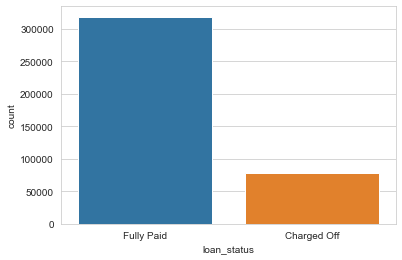

In [13]:
sns.countplot(x='loan_status',data=data)

In [14]:
sns.histplot(data=data,x='loan_amnt',hue='loan_status',bins=100)

AttributeError: module 'seaborn' has no attribute 'histplot'

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='installment',y='loan_amnt',data=data,hue='int_rate')

In [ ]:
sns.boxplot(x='loan_status',y='loan_amnt',data=data)

In [ ]:
data.head(2)

In [ ]:
data.groupby('loan_status')['loan_amnt'].describe()

In [ ]:
sorted(data['grade'].unique())

In [ ]:
sorted(data['sub_grade'].unique())

In [ ]:
sns.countplot(x='grade',data=data,hue='loan_status')

In [ ]:
plt.figure(figsize=(12,4))
subgrade_order = sorted(data['sub_grade'].unique())
sns.countplot(x='sub_grade',data=data,order=subgrade_order,palette='coolwarm')


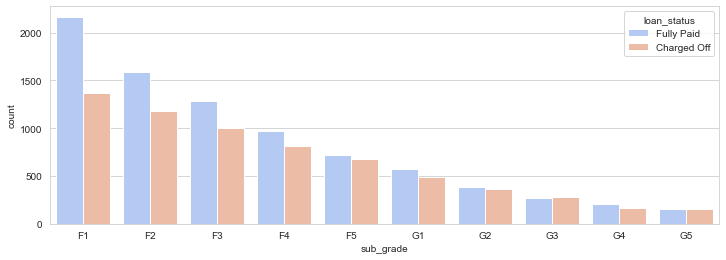

In [15]:
f_and_g = data[(data['grade']=='G') | (data['grade']== 'F')]
plt.figure(figsize=(12,4))
subgrade_order = sorted(f_and_g['sub_grade'].unique())
sns.countplot(x='sub_grade',data=data,order=subgrade_order,palette='coolwarm',hue='loan_status')

In [16]:
data['loan_repaid'] = data['loan_status'].map({'Fully Paid':1,'Charged Off':0})

In [17]:
data[['loan_status','loan_repaid']]

,loan_status,loan_repaid
0,Fully Paid,1
1,Fully Paid,1
2,Fully Paid,1
3,Fully Paid,1
4,Charged Off,0
...,...,...
396025,Fully Paid,1
396026,Fully Paid,1
396027,Fully Paid,1
396028,Fully Paid,1


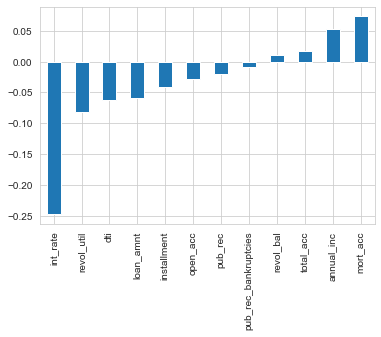

In [18]:
data.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')

In [19]:
# Checking for missing values

In [20]:
100*data.isnull().sum()/len(data)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [21]:
len(data)

396030

In [22]:
# Data Preprocessing

In [23]:
#Examining emp_title
data['emp_title'].nunique()


173105

In [24]:
data = data.drop('emp_title',axis=1)

In [25]:
#Examine emp_'length
sorted(data['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [26]:
sort_order = [
 '< 1 year',
 '1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '10+ years'
 ]

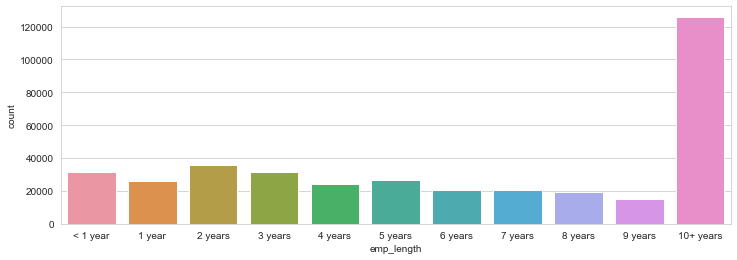

In [27]:
plt.figure(figsize=(12,4))
sns.countplot(x='emp_length',data=data,order=sort_order)

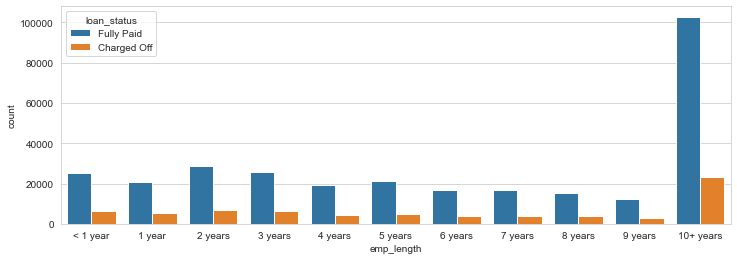

In [28]:
plt.figure(figsize=(12,4))
sns.countplot(x='emp_length',data=data,order=sort_order,hue='loan_status')

In [29]:
emp_co = data[data['loan_status']=='Charged Off'].groupby('emp_length').count()['loan_status']

In [30]:
emp_fp = data[data['loan_status']=='Fully Paid'].groupby('emp_length').count()['loan_status']

In [31]:
emp_len = emp_co/(emp_fp+emp_co)

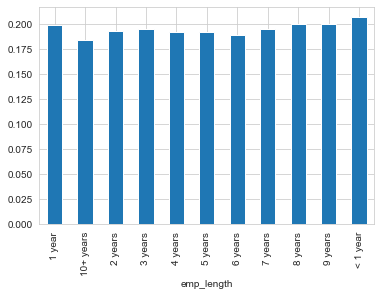

In [32]:
emp_len.plot(kind='bar')

In [33]:
# So as all the ration seems similar, the data will not provide a lot of variation for
# the network to learn so its better we drop it


In [34]:
data = data.drop('emp_length',axis=1)

In [35]:
data.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [36]:
data['purpose']

0                   vacation
1         debt_consolidation
2                credit_card
3                credit_card
4                credit_card
                 ...        
396025    debt_consolidation
396026    debt_consolidation
396027    debt_consolidation
396028    debt_consolidation
396029    debt_consolidation
Name: purpose, Length: 396030, dtype: object

In [37]:
data = data.drop('title',axis=1)

In [38]:
# Lets fill in the missing data

In [39]:
data['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

In [40]:
data.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [41]:
# Here we see that the total_acc column is corelated with the mort_acc colums and we 
# will try to attempt to get the missing values using that columns

In [42]:
total_acc_mean = data.groupby('total_acc').mean()['mort_acc']

In [43]:
def fill_mort_acc(total_acc,mort_acc):
  if np.isnan(mort_acc):
    return total_acc_mean[total_acc]
  else:
    return mort_acc


In [44]:
data['mort_acc'] = data.apply(lambda x: fill_mort_acc(x['total_acc'],x['mort_acc']),axis=1)

In [45]:
data.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [46]:
data = data.dropna()

In [47]:
data.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

In [48]:
# Dealing with Categorical Variables

In [49]:
data.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [50]:
data['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [51]:
data['term'][0][:3]

' 36'

In [52]:
data['term'] = data['term'].apply(lambda term: int(term[:3]))

In [53]:
data['term'].value_counts()

36    301247
60     93972
Name: term, dtype: int64

In [54]:
data = data.drop('grade',axis=1)

In [55]:
dummies = pd.get_dummies(data['sub_grade'],drop_first=True)
data = pd.concat([data.drop('sub_grade',axis=1),dummies],axis=1)

In [56]:
dummies = pd.get_dummies(data[['verification_status','application_type','initial_list_status','purpose']],drop_first=True)
data = pd.concat([data.drop(['verification_status','application_type','initial_list_status','purpose'],axis=1),dummies],axis=1)

In [57]:
data['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [58]:
data['home_ownership']= data['home_ownership'].replace(['NONE','ANY'],'OTHER')

In [59]:
dummies = pd.get_dummies(data['home_ownership'],drop_first=True)
data = pd.concat([data.drop('home_ownership',axis=1),dummies],axis=1)

In [60]:
data['address']

0              0174 Michelle Gateway\nMendozaberg, OK 22690
1           1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2           87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3                     823 Reid Ford\nDelacruzside, MA 00813
4                      679 Luna Roads\nGreggshire, VA 11650
                                ...                        
396025       12951 Williams Crossing\nJohnnyville, DC 30723
396026    0114 Fowler Field Suite 028\nRachelborough, LA...
396027     953 Matthew Points Suite 414\nReedfort, NY 70466
396028    7843 Blake Freeway Apt. 229\nNew Michael, FL 2...
396029          787 Michelle Causeway\nBriannaton, AR 48052
Name: address, Length: 395219, dtype: object

In [61]:
data['address'][0][-5:]

'22690'

In [62]:
data['address'][0]

'0174 Michelle Gateway\nMendozaberg, OK 22690'

In [63]:
data['zip_code'] = data['address'].apply(lambda address: address[-5:])

In [64]:
data = data.drop('address',axis=1)

In [65]:
dummies = pd.get_dummies(data['zip_code'],drop_first=True)
data = pd.concat([data.drop('zip_code',axis=1),dummies],axis=1)

In [66]:
data = data.drop('issue_d',axis=1)

In [67]:
data['earliest_cr_line']= data['earliest_cr_line'].apply(lambda date: int(date[4:]))

In [68]:
data['earliest_cr_line'][0]

1990

In [69]:
# Data Preprosessing

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
data = data.drop('loan_status',axis=1)

In [72]:
X = data.drop('loan_repaid',axis=1).values
y = data['loan_repaid'].values

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [74]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((316175, 78), (79044, 78), (316175,), (79044,))

In [76]:
from sklearn.preprocessing import MinMaxScaler

In [77]:
scaler  = MinMaxScaler()

In [78]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [79]:
# Creating a Model

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

ModuleNotFoundError: No module named 'tensorflow'

In [81]:
model = Sequential()

model.add(Dense(78,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(39,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(19,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')


In [83]:
X_train.shape

(316175, 78)

In [85]:
316175/256


1235.05859375

In [84]:
model.fit(x=X_train,y=y_train,epochs=25,batch_size=256,
          validation_data=(X_test,y_test))

Epoch 1/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2998 - val_loss: 0.2663
Epoch 2/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2650 - val_loss: 0.2636
Epoch 3/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2624 - val_loss: 0.2627
Epoch 4/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2616 - val_loss: 0.2621
Epoch 5/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2607 - val_loss: 0.2619
Epoch 6/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2603 - val_loss: 0.2626
Epoch 7/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2597 - val_loss: 0.2615
Epoch 8/25
1236/1236 [==============================] - 4s 4ms/step - loss: 0.2595 - val_loss: 0.2612
Epoch 9/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2591 - val_loss: 0.2615
Epoch 10/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.258

In [86]:
from tensorflow.keras.models import load_model

In [87]:
model.save('Loan_Lending_Model.h5')

In [88]:
#Evaluating the model

In [89]:
losses = pd.DataFrame(model.history.history)

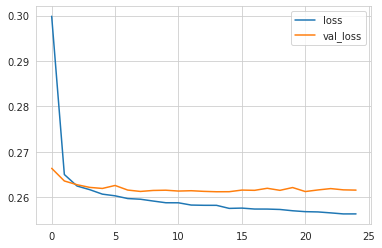

In [90]:
losses.plot()

In [91]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,average_precision_score

In [92]:
predictions = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [93]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.44      0.61     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044

